Data Science 100 Project: Individual Project Planning Stage  | Owen Chen 73602740

(1) Data Description 

players.csv: This data set contains 7 variables and 196 observations.

#### Table 1. Variable Names, Types and Meaning in players.csv

| Variable     | Type      | Meaning                                                        |
|---------------|-----------|----------------------------------------------------------------|
| experience    | factor    |Minecraft Gaming Experience level (Veteran, Pro, Amateur, Regular).        |
| subscribe     | logical   | Status of player's subscription (TRUE/FALSE).             |
| hashedEmail   | character | Anonymous email addresses of players and session data.                             |
| played_hours  | double    | Total number of hours played by the individual on the server.                                  |
| name          | character |The Player's Display name                                             |
| gender        | factor    | Gender of the player                                            |
| Age           | integer   | Player's age in years.                                     |

Potential issues in players.csv
- Missing values (N/A)

sessions.csv: This data set contains 5 variables and 1535 observations

#### Table 2. Variable Names, Types and Meaning in sessions.csv

| Variable     | Type      | Meaning                                                        |
|---------------|-----------|----------------------------------------------------------------|
| hashedEmail   | Character    |Anonymous email addresses of players and session data.        |
| start_time          |Character |The timestamp start of a gameplay session in Milliseconds.
| end_time            |Character |The timestamp stop of a gameplay session in Milliseconds.                           |
| original_start_time |Double    |Start time in Epoch Milliseconds.                                      |
| original_end_time   |Double    |End time in Epoch Milliseconds.                                       |


Potential issues in sessions.csv
- Missing values (N/A)
- Inconsistency in time formats

(2)Questions:

One broad question that I have chosen is 
Can the  variables of gender, age, subscription, and experience be used to predict the total hours played by a player?

To answer this, only the players.csv dataset will be used. The required variables to answer the question would include experience, gender, age, subscription, and played_hours. Only minimal wrangling is needed to remove unnecessary variables within the players.csv.

(3)Exploratory Data Analysis and Visualization:

In [10]:
    library(tidyverse)
    library(readr)
    library(dplyr)
    library(ggplot2)
    library(tidymodels)
    library(knitr)

In [19]:
player_data<- read_csv('players.csv')
sessions_data<-read_csv('sessions.csv')

split_player<- initial_split(player_data)
training_split<- training(split_player)
testing_player<- testing(split_player)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Firstly, we need to use as_factor for all categorical variables so that they can be grouped. Otherwise, no further wrangling is needed, as the player_csv dataset is already tidy, as each observation is a singular person, every variable has its own column, and each value is a single cell.

In [12]:
summary(player_data)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [13]:
summary(sessions_data)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

In [14]:
mean_summary <- player_data |>
  summarize(
    Mean_Age = mean(Age, na.rm = TRUE),
    Mean_Played_Hours = mean(played_hours, na.rm = TRUE)
  ) |>
  pivot_longer(cols = everything(), names_to = "Variable", values_to = "Mean_Value") |>
  mutate(Mean_Value = round(Mean_Value, 2))


kable(mean_summary, caption = "3. Mean Values of Quantitative Variables in Players Dataset")



Table: 3. Mean Values of Quantitative Variables in Players Dataset

|Variable          | Mean_Value|
|:-----------------|----------:|
|Mean_Age          |      21.14|
|Mean_Played_Hours |       5.85|

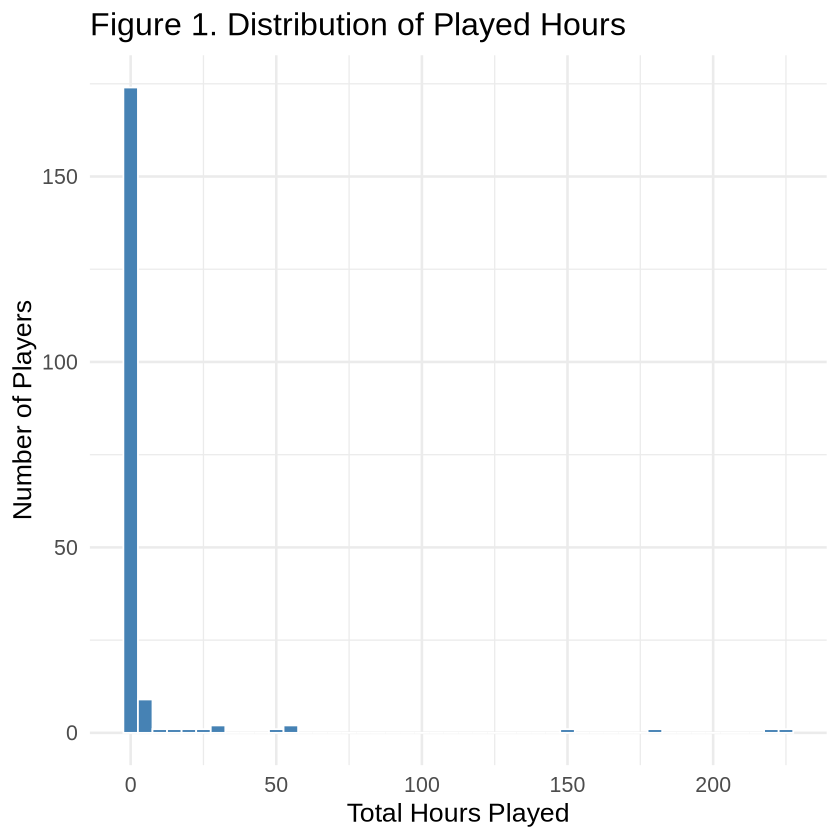

In [20]:
distribution_total_hours_played <- ggplot(player_data, aes(x = played_hours)) +
  geom_histogram(binwidth = 5, fill = "steelblue", color = "white") +
  labs(
    title = "Figure 1. Distribution of Played Hours",
    x = "Total Hours Played",
    y = "Number of Players"
  ) +
  theme_minimal(base_size = 16)
distribution_total_hours_played

Insight: Most players play for less than 10 hours, with very few playing for more than 200, indicating outliers.

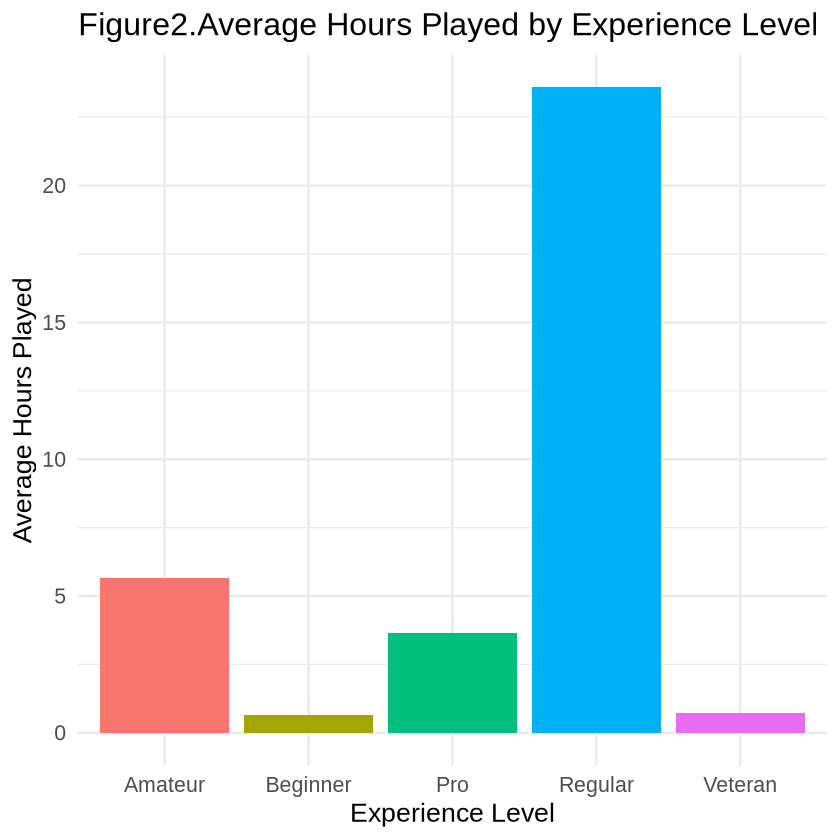

In [21]:
average_hours_played_experience <-training_split |>
  group_by(experience) |>
  summarize(mean_hours = mean(played_hours, na.rm = TRUE)) |>
  ggplot(aes(x = experience, y = mean_hours, fill = experience)) +
  geom_col(show.legend = FALSE) +
  labs(
    title = "Figure2.Average Hours Played by Experience Level",
    x = "Experience Level",
    y = "Average Hours Played"
  ) +
  theme_minimal(base_size = 16)
average_hours_played_experience 


Insight: The regular experience level group has  the highest average total playtime, significantly larger than other experience level groups, indicating unequal sample sizes.

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


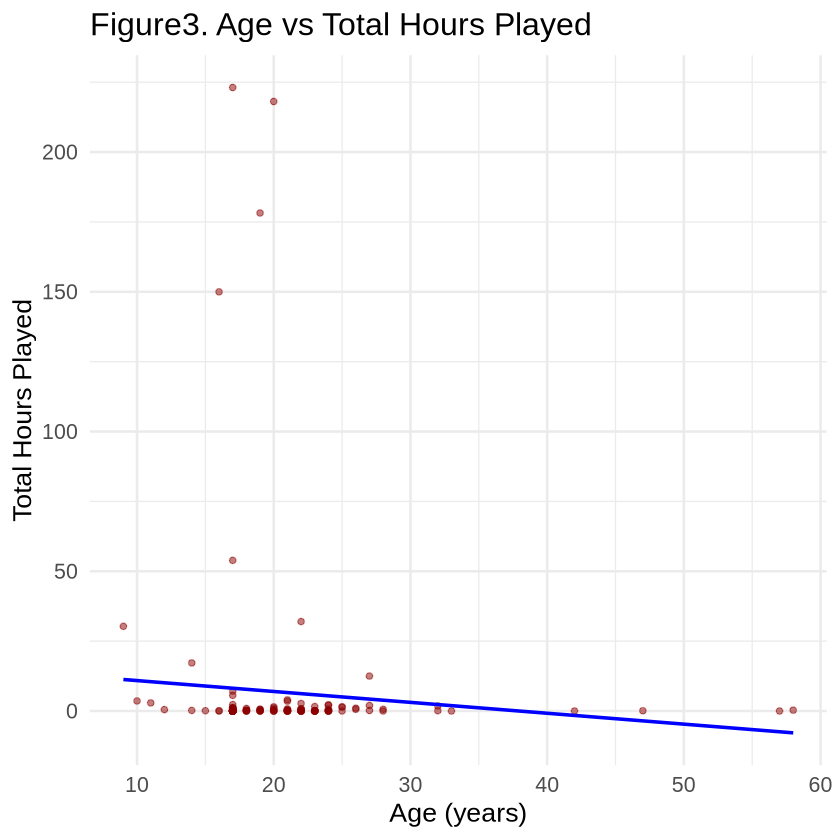

In [22]:
Total_hours_played_age<-ggplot(training_split, aes(x = Age, y = played_hours)) +
  geom_point(alpha = 0.5, color = "darkred") +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(
    title = "Figure3. Age vs Total Hours Played",
    x = "Age (years)",
    y = "Total Hours Played"
  ) +
  theme_minimal(base_size = 16)
Total_hours_played_age

Insight: The negative trend line suggests younger players spend more hours playing, though there is high variability.

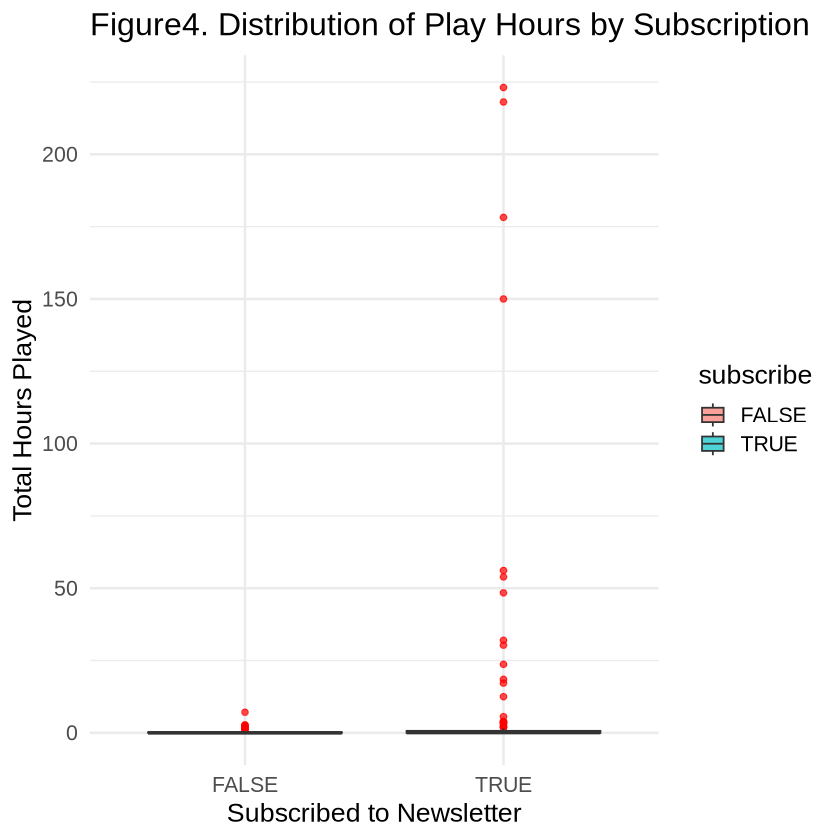

In [18]:
subscribe_graph<-ggplot(training_split, aes(x = subscribe, y = played_hours, fill = subscribe)) +
  geom_boxplot(alpha = 0.7, outlier.color = "red") +
  labs(
    title = "Figure4. Distribution of Play Hours by Subscription",
    x = "Subscribed to Newsletter",
    y = "Total Hours Played"
  ) +
  theme_minimal(base_size = 16)
subscribe_graph

Insight: Subscribed have more total hours played, suggesting a possible correlation with this predictor.

(4) Method and Plan

The method I will use to address the question is knn-regression, to predict the total hours played using Age as the quantitative predictor variable, since the other variables are categorical. Thus, I plan to split the data into multiple subsets and perform knn-regression on each individual subset. Since the variable experience has 5 categories, subscribe has 2 categories and gender has 7 categories, there would be 70 potential subsets of data (5 x 2 x 7). Then, k-nn regression will be performed with Age as the predictor and played_hours as the response variable.
This method is appropriate because it can capture nonlinear relationships between age and total playtime and accommodates mixed data types.

One assumption needed is that players with similar ages within each category subset would be expected to have similar playtime.

A limitation is that small subsets would have reduced reliability due to fewer neighbours due to a lack of neighbours. Furthermore, splitting data into subsets also reduces the reliability of the predictions. 


To choose the optimal k value and model for each variable combination, a cross-validation will be performed on each subset. However, this is only possible with variable combinations that have a sufficient sample size. Prior to the cross-validation, the data will be split 80% into training and 20% into testing. The larger split into training is to ensure that there is enough data for model fitting.

